In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py  # for reading .nirs files
import json
import scipy.io as sio  # for reading .mat files
import seaborn as sns

In [4]:
EXP_NAME = "New10Subject1/2024-06-14_002"

preprocessed_data = np.load(f'{EXP_NAME}/2024-06-14_002PreprocessedData.npy')
labels = np.load(f'{EXP_NAME}/2024-06-14_002Labels.npy', allow_pickle=True)

print(preprocessed_data.shape)
print(labels.shape)

(40, 84, 93)
(41, 3)


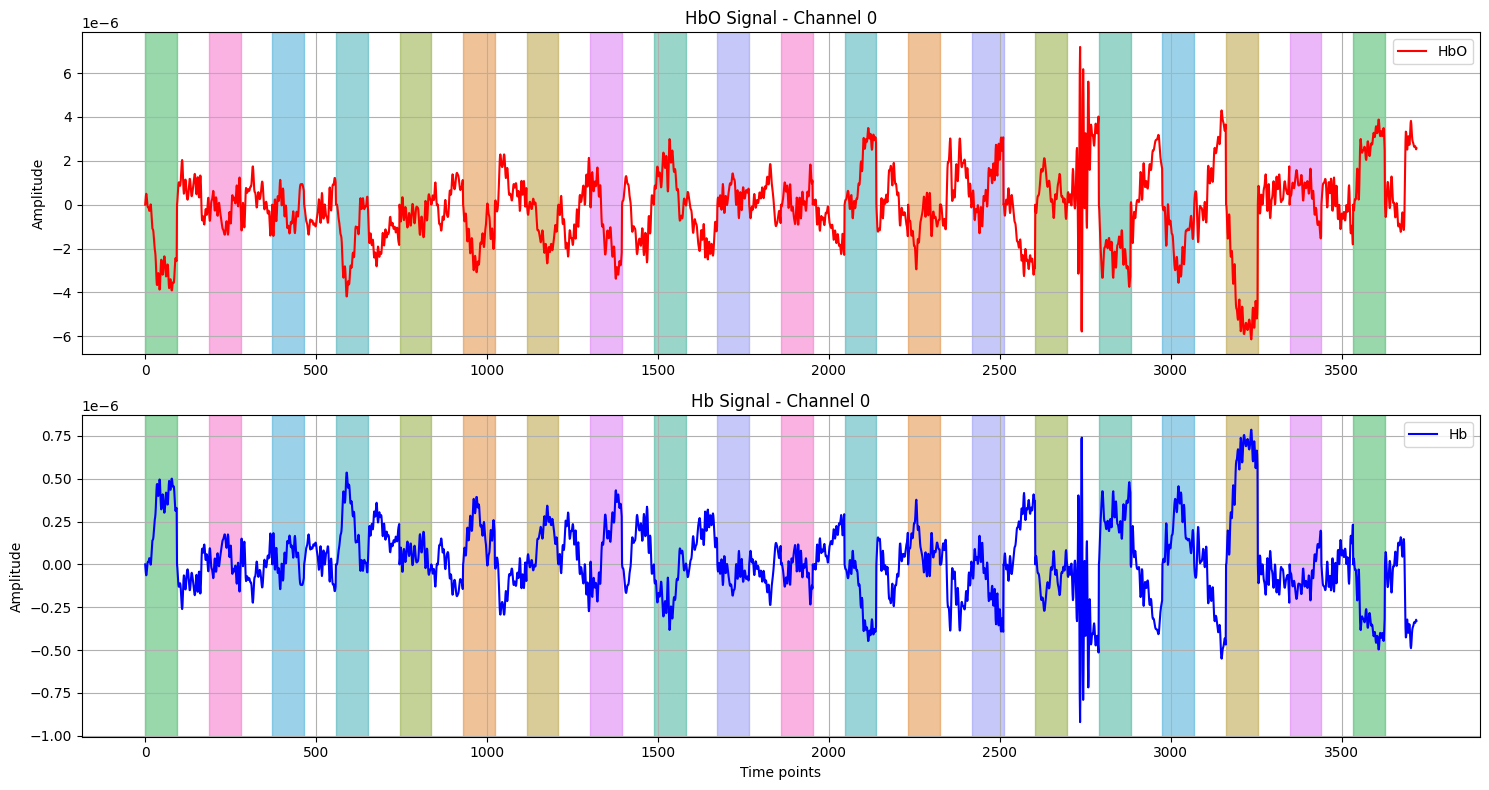

In [22]:
# plot Hb and HbO for one channel each

channel_idx = 0
hbo_data = preprocessed_data[:, channel_idx * 2, :]
hb_data = preprocessed_data[:, channel_idx * 2 + 1, :]

# Concatenate all trials for continuous visualization
full_hbo = hbo_data.flatten()
full_hb = hb_data.flatten()

# Create time points (assuming all trials are continuous)
time_points = np.arange(len(full_hbo))

# Plot
plt.figure(figsize=(15, 8))

# HbO subplot
plt.subplot(2, 1, 1)
plt.plot(time_points, full_hbo, 'r-', label='HbO')
plt.title(f'HbO Signal - Channel {channel_idx}')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

cmap = sns.color_palette("husl", 11)

for i in range(len(labels)):
    if float(labels[i][2]) != 0.0:
        plt.axvspan(i * 93, (i + 1) * 93, color=cmap[int(float(labels[i][2]))], alpha=0.5)

# Hb subplot
plt.subplot(2, 1, 2)
plt.plot(time_points, full_hb, 'b-', label='Hb')
plt.title(f'Hb Signal - Channel {channel_idx}')
plt.xlabel('Time points')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

for i in range(len(labels)):
    if float(labels[i][2]) != 0.0:
        plt.axvspan(i * 93, (i + 1) * 93, color=cmap[int(float(labels[i][2]))], alpha=0.5)

plt.tight_layout()
plt.show()

It appears that my assumption was correct; the data is in the order of HbO...Hb, instead of one after the other. HbO usually increases when Hb decreases.